In [1]:
# Henry Zou
# ALY 6020

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read excel file
data1 = pd.read_excel('week 4 - Assignment.xlsx', index_col = None)
data1

,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# rename columns name
data1.columns = ['Pregnancies', 'Glucose', 
                 'Blood Pressure', 'Triceps skinfold thickness', 
                 'Serum insulin', 'BMI', 'Diabetes pedigree', 'Age', 'Class']
data1

,Pregnancies,Glucose,Blood Pressure,Triceps skinfold thickness,Serum insulin,BMI,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3> EDA </h3>

In [5]:
# basic info
data1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   Serum insulin               768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes pedigree           768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# describe
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skinfold thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Serum insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h5> we can see that some of the columns have min 0, but columns like blood pressure cannot be 0, otherwise people would be dead already. therefore we need to consider data missing cases </h5>

In [7]:
# Null data:
data1.isnull().values.any()

False

In [8]:
# check for missing zeros for each columns:
feature_columns = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Triceps skinfold thickness', 'Serum insulin', 'BMI',
                   'Diabetes pedigree', 'Age']
for i in feature_columns:
    print(f'{i} --> Missing Zeros : {len(data1.loc[data1[i] == 0])}')

Pregnancies --> Missing Zeros : 111
Glucose --> Missing Zeros : 5
Blood Pressure --> Missing Zeros : 35
Triceps skinfold thickness --> Missing Zeros : 227
Serum insulin --> Missing Zeros : 374
BMI --> Missing Zeros : 11
Diabetes pedigree --> Missing Zeros : 0
Age --> Missing Zeros : 0


In [9]:
# replace 0 value with suitable values, lets use Nan for now:
data1_copy = data1.copy(deep = True)
data1_copy[['Glucose', 'Blood Pressure', 'Triceps skinfold thickness', 'Serum insulin', 
            'BMI']] = data1_copy[['Glucose', 'Blood Pressure', 'Triceps skinfold thickness', 
                                  'Serum insulin', 'BMI']].replace(0, np.NaN)


In [10]:
# count of NaNs:
print(data1_copy.isnull().sum())

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Triceps skinfold thickness    227
Serum insulin                 374
BMI                            11
Diabetes pedigree               0
Age                             0
Class                           0
dtype: int64


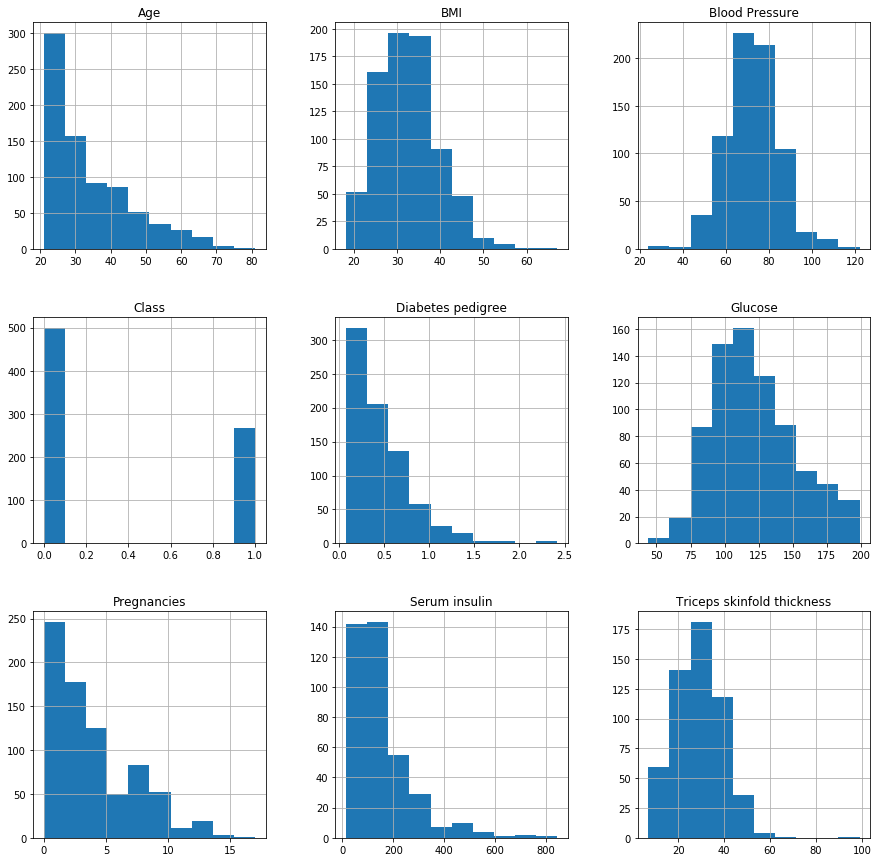

In [11]:
dist = data1_copy.hist(figsize = (15,15))
dist;

<h4>1) we can see that blood pressure and Glucose are normal distributed (closely), we can use mean value to replace the NaN value </h4>
<h4>2) Triceps skinfold thickness, BMI and Serum insulin however, are not in a bell shaped, we can use median value to replace the NaN value </h4>

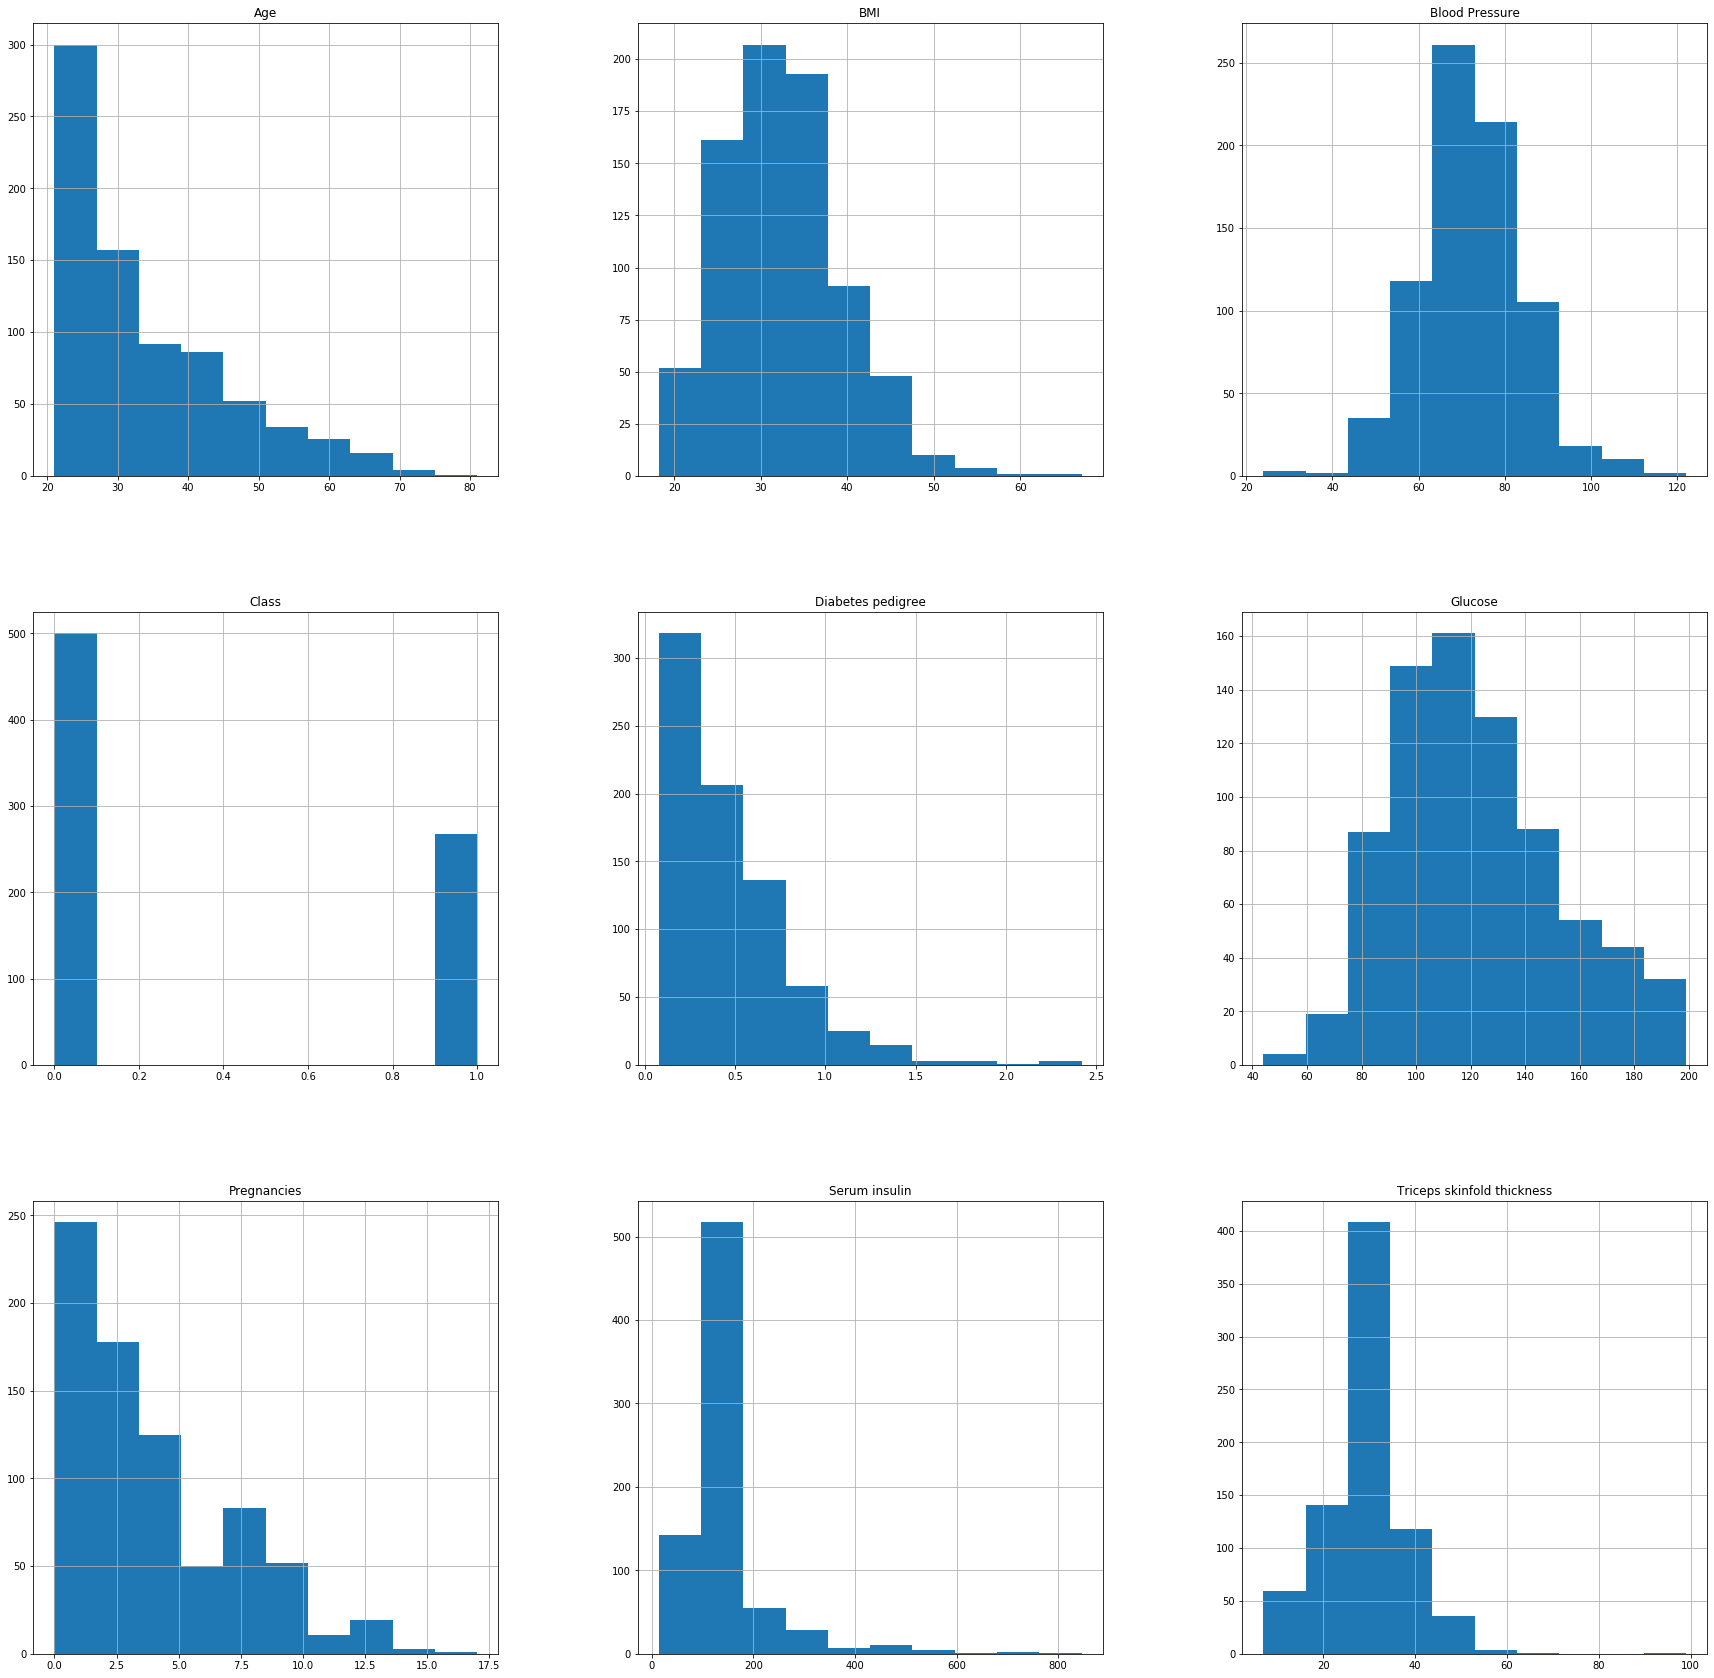

In [12]:
# fill Nan with mean or median values:
data1_copy['Glucose'].fillna(data1_copy['Glucose'].mean(), inplace = True)
data1_copy['Blood Pressure'].fillna(data1_copy['Blood Pressure'].mean(), inplace = True)

data1_copy['Triceps skinfold thickness'].fillna(data1_copy['Triceps skinfold thickness'].median(), inplace = True)
data1_copy['BMI'].fillna(data1_copy['BMI'].median(), inplace = True)
data1_copy['Serum insulin'].fillna(data1_copy['Serum insulin'].median(), inplace = True)

dist = data1_copy.hist(figsize = (30,30))
dist;

In [13]:
# check remodified data:
data1_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
Blood Pressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
Triceps skinfold thickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Serum insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
Diabetes pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


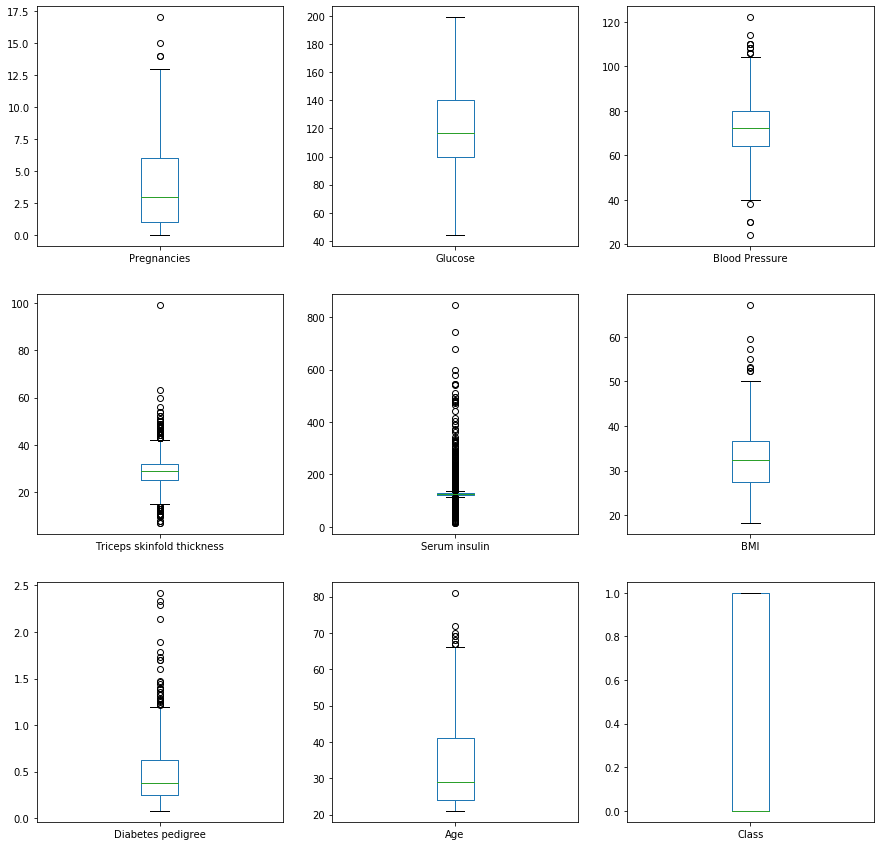

In [14]:
# Boxplot
data1_copy.plot(kind = 'box', subplots = True, layout = (3,3),  sharex = False, sharey = False, figsize = (15, 15));


<h4> from above histograms, we can see that all features are not at the same scale, we can use scaling features to remodify our dataset </h4>

In [15]:
# load scaler
from sklearn.preprocessing import StandardScaler

X = data1_copy.drop('Class', axis = 1) # input feature vector
y = data1_copy['Class']              # Labelled Target vector

# start scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)
X

,Pregnancies,Glucose,Blood Pressure,Triceps skinfold thickness,Serum insulin,BMI,Diabetes pedigree,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [16]:
# check for correlation
new_corr = data1_copy.corr()
print(new_corr['Class'].sort_values(ascending = False))

Class                         1.000000
Glucose                       0.492928
BMI                           0.312038
Age                           0.238356
Pregnancies                   0.221898
Triceps skinfold thickness    0.214873
Serum insulin                 0.203790
Diabetes pedigree             0.173844
Blood Pressure                0.166074
Name: Class, dtype: float64


In [17]:
# split dataset into training and testing groups with ratio 8:2 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


<h3>1) Logistic Regression </h3>

In [18]:
# import required modules:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# construct modeling
LR = LogisticRegressionCV()

# fitting data
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)

# check accuracy
cm = confusion_matrix(y_test, LR_y_pred)
print(cm)

print('Accuracy Score for testing is {}'.format(accuracy_score(LR_y_pred, y_test)))

[[84 11]
 [29 30]]
Accuracy Score for testing is 0.7402597402597403


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<h4> Our confusion matrix for Logistic Regression shows that among the total 95 Actual No, we successfully predicted 84 of them and mispredicted 11 of them </h4>
<h4> On the other hand, among the total 59 Actual Yes, we successfully predicted 30 of them and mispredicted 29 of them </h4>
<h4> That means we made a total of 114 correct predictions out of a total of 154 (~74%). 

<h3>2) Naive Bayes Classifier </h3>

In [19]:
# import required modules:
from sklearn.naive_bayes import GaussianNB

# construct modeling
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_y_pred = NB.predict(X_test)

# check accuracy
cm = confusion_matrix(y_test, NB_y_pred)
print(cm)

print('Accuracy Score for testing is {}'.format(accuracy_score(NB_y_pred, y_test)))

[[82 13]
 [27 32]]
Accuracy Score for testing is 0.7402597402597403


<h4> Our confusion matrix for Naive Bayes shows that among the total 95 Actual No, we successfully predicted 82 of them and mispredicted 13 of them </h4>
<h4> On the other hand, among the total 59 Actual Yes, we successfully predicted 32 of them and mispredicted 27 of them </h4>
<h4> That means we made a total of 114 correct predictions out of a total of 154 (~74%). 

<h3>3) Decision tree classifier </h3>

In [20]:
# import required modules:
from sklearn.tree import DecisionTreeClassifier

# construct modeling
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_y_pred = DT.predict(X_test)

# check accuracy
cm = confusion_matrix(y_test, DT_y_pred)
print(cm)

print('Accuracy Score for testing is {}'.format(accuracy_score(DT_y_pred, y_test)))

[[75 20]
 [22 37]]
Accuracy Score for testing is 0.7272727272727273


<h4> Our confusion matrix for Decision Tree shows that among the total 95 Actual No, we successfully predicted 72 of them and mispredicted 23 of them </h4>
<h4> On the other hand, among the total 59 Actual Yes, we successfully predicted 34 of them and mispredicted 25 of them </h4>
<h4> That means we made a total of 106 correct predictions out of a total of 154 (~68.88%). 

<h3>4) Random Forest Classifier </h3>

In [21]:
# import required modules:
from sklearn.ensemble import RandomForestClassifier

# construct modeling
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)
RF_y_pred = RF.predict(X_test)

# check accuracy
cm = confusion_matrix(y_test, RF_y_pred.round())
print(cm)

print('Accuracy Score for testing is {}'.format(accuracy_score(RF_y_pred.round(), y_test)))

[[82 13]
 [29 30]]
Accuracy Score for testing is 0.7272727272727273


<h4> Our confusion matrix for Random Forest shows that among the total 95 Actual No, we successfully predicted 85 of them and mispredicted 10 of them </h4>
<h4> On the other hand, among the total 59 Actual Yes, we successfully predicted 31 of them and mispredicted 28 of them </h4>
<h4> That means we made a total of 116 correct predictions out of a total of 154 (~75.32%). 

<h3>5) Boosted Tree </h3>

In [22]:
# import required modules:
from sklearn.ensemble import GradientBoostingClassifier

# construct modeling
BT = GradientBoostingClassifier(n_estimators = 100)
BT.fit(X_train, y_train)
BT_y_pred = BT.predict(X_test)

# check accuracy
cm = confusion_matrix(y_test, BT_y_pred.round())
print(cm)

print('Accuracy Score for testing is {}'.format(accuracy_score(BT_y_pred.round(), y_test)))

[[79 16]
 [24 35]]
Accuracy Score for testing is 0.7402597402597403


<h3> 6) K-Nearest Neighbors (KNN) </h3>

In [23]:
# import required modules:
from sklearn.neighbors import KNeighborsClassifier

# construct modeling
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_y_pred = KNN.predict(X_test)

# check accuracy
cm = confusion_matrix(y_test, KNN_y_pred.round())
print(cm)

print('Accuracy Score for testing is {}'.format(accuracy_score(KNN_y_pred.round(), y_test)))

[[79 16]
 [25 34]]
Accuracy Score for testing is 0.7337662337662337


In [24]:
# test_scores = []
# train_scores = []

# for i in range(1,15):

#     knn = KNeighborsClassifier(i)
#     knn.fit(X_train,y_train)
    
#     train_scores.append(knn.score(X_train,y_train))
#     test_scores.append(knn.score(X_test,y_test))
    
# ## score that comes from testing on the same datapoints that were used for training    
# max_train_score = max(train_scores)
# train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
# print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

# ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
# max_test_score = max(test_scores)
# test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
# print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))